In [1]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive to access files

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FloodingAttack.csv', low_memory=False) # Load the dataset from Google Drive

In [4]:
df.shape

(99999, 47)

In [5]:
df.columns

Index(['Unnamed: 0', 'pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto',
       'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum',
       'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate',
       'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'category', 'subcategory'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,0
daddr,0


In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,0
daddr,0


In [9]:
df.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1528102921,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1528102921,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1528102921,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1528102921,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1528102921,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.dport.value_counts()

,count
dport,
80,99989
-1,1
1160,1
1161,1
1164,1
1165,1
1170,1
1171,1
1174,1


In [13]:
df.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1528102921,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,80,100,17290,RST,1,1528102928,20,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1528102921,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,80,100,16040,RST,1,1528102928,21,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1528102921,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,80,80,17080,RST,1,1528102928,22,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1528102921,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,80,80,14620,RST,1,1528102928,23,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,762,700,1.093630,0.624931,0.898208,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1528102921,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,80,80,12960,RST,1,1528102928,24,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,596,700,1.093669,0.624954,0.898394,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [14]:
df.nunique()

,0
pkSeqID,99999
stime,37
flgs,5
flgs_number,5
proto,2
proto_number,2
saddr,5
sport,34119
daddr,2
dport,11


In [15]:
df.drop(columns=['flgs', 'proto', 'state', 'category', 'attack', 'saddr', 'daddr', 'sport', 'dport', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', ], inplace=True, axis=1)

In [16]:
df.shape

(99999, 33)

In [17]:

df.subcategory.value_counts()

,count
subcategory,
Flooding,99010
HTTP,989


In [18]:
mapper = {
    'Normal': 0,
    'TCP': 1,
    'UDP': 2,
    'HTTP': 3,
    'Flooding':4,
}

df['subcategory'] = df['subcategory'].map(mapper)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pkSeqID                           99999 non-null  int64  
 1   stime                             99999 non-null  int64  
 2   flgs_number                       99999 non-null  int64  
 3   proto_number                      99999 non-null  int64  
 4   pkts                              99999 non-null  int64  
 5   bytes                             99999 non-null  int64  
 6   state_number                      99999 non-null  int64  
 7   ltime                             99999 non-null  int64  
 8   seq                               99999 non-null  int64  
 9   dur                               99999 non-null  float64
 10  mean                              99999 non-null  float64
 11  stddev                            99999 non-null  float64
 12  sum 

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('subcategory', axis=1)
y = df['subcategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (79999, 32)
y_train shape: (79999,)
X_test shape: (20000, 32)
y_test shape: (20000,)


In [21]:

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Define the calculate_entropy function
def calculate_entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calculate entropy for the entire training set
entropy_train = calculate_entropy(y_train)

# Calculate entropy for the entire test set
entropy_test = calculate_entropy(y_test)

# Decision Tree
entropy_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_dt.fit(X_train, y_train)
# Random Forest
entropy_rf = RandomForestClassifier(criterion='entropy', random_state=42)
entropy_rf.fit(X_train, y_train)

# Extra Trees
entropy_et = ExtraTreesClassifier(criterion='entropy', random_state=42)
entropy_et.fit(X_train, y_train)

# Print the models and entropy
print("Entropy of the training set:", entropy_train)
print("Entropy of the test set:", entropy_test)
print("Decision Tree with Entropy:", entropy_dt)
print("Random Forest with Entropy:", entropy_rf)
print("Extra Trees with Entropy:", entropy_et)



Entropy of the training set: 0.08004722905008475
Entropy of the test set: 0.08012946918370271
Decision Tree with Entropy: DecisionTreeClassifier(criterion='entropy', random_state=42)
Random Forest with Entropy: RandomForestClassifier(criterion='entropy', random_state=42)
Extra Trees with Entropy: ExtraTreesClassifier(criterion='entropy', random_state=42)


In [22]:
from sklearn.metrics import accuracy_score

# Decision Tree
y_pred_dt = entropy_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Random Forest
y_pred_rf = entropy_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Extra Trees
y_pred_et = entropy_et.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)

# Print the accuracy scores
print("Decision Tree Accuracy:", accuracy_dt)
print("Random Forest Accuracy:", accuracy_rf)
print("Extra Trees Accuracy:", accuracy_et)


Decision Tree Accuracy: 0.99995
Random Forest Accuracy: 1.0
Extra Trees Accuracy: 1.0


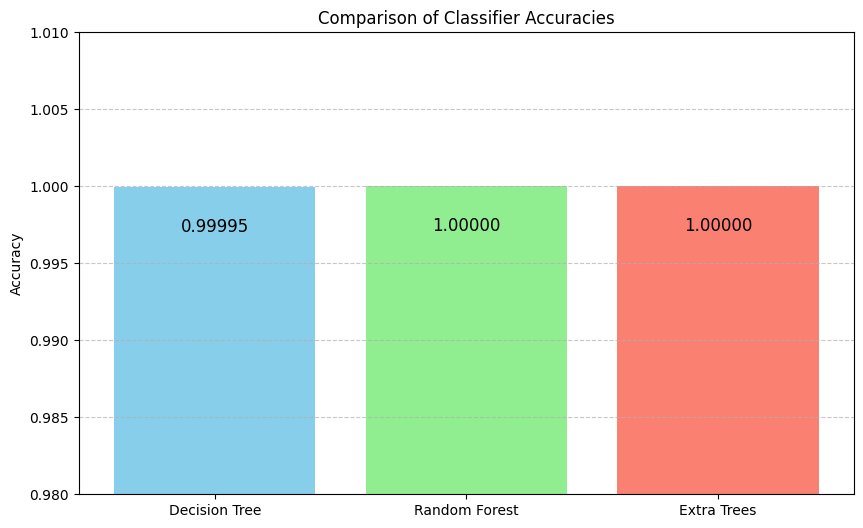

In [27]:
import matplotlib.pyplot as plt

# Accuracy values
accuracies = [accuracy_dt, accuracy_rf, accuracy_et]
models = ['Decision Tree', 'Random Forest', 'Extra Trees']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen',  'salmon'])
plt.ylim(0.98, 1.01)
plt.title('Comparison of Classifier Accuracies')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with exact accuracy
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.002,
             f'{acc:.5f}', ha='center', va='top', fontsize=12)

plt.show()


